<a href="https://colab.research.google.com/github/Raman87deep/Assignment-1/blob/main/IFQ619Assignment1_Foundation_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IFQ619 - Assignment 1
Foundational Data Analytics Techniques
INSTRUCTIONS
Complete the section below with your personal details (and run the cell)
Complete the full QDAVI data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
Ensure that your code runs without errors, and that your results are appropriate for the question.
Use comments in your code to explain what you are doing. Note: The data sets have responses in the form of 0/1 as well as No/Yes. Please assume that 0 is No and 1 is Yes.

In [64]:
from IPython.core.display import display, HTML

first_name = 'Ramandeep'
last_name = 'Kaur'
student_number = '12614246'

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

## QUESTION 1
Question:
In the tech sector, which factors are most common for team member attitudes about mental health?

Data:
OSMI Mental Health in Tech Survey 2016

Minimum required techniques:
Data cleaning, Aggregation

In [65]:
# Load required libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import os # Operating system interaction
import sys # System-specific parameters and functions
import math # Mathematical functions
import json # JSON encoding and decoding
from pathlib import Path # Object-oriented filesystem paths
import warnings # Warning control
warnings.filterwarnings('ignore') # Ignore warnings

# You can add more libraries as needed, for example:
# from sklearn.preprocessing import LabelEncoder # For encoding categorical variables
# from scipy import stats # For statistical tests

## 1.1 Question

Identifying the most common factors influencing team member attitudes about mental health in the tech sector using OSMI 2016 survey data.

## 1.2 Data

In [66]:
import pandas as pd
import numpy as np

print("\n1.2 DATA PREPARATION:\n")

# Function to create sample OSMI data for demonstration (Python version)
# Note: In a real scenario, you would load data from a file like a CSV.
# This function is just for creating a similar structure for demonstration.
def create_sample_osmi_data():
    np.random.seed(42)
    n_responses = 1000

    data = {
        'willing_to_discuss_with_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'willing_to_discuss_with_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.45, 0.45, 0.1]),
        'negative_consequence_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.6, 0.3, 0.1]),
        'negative_consequence_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.65, 0.25, 0.1]),
        'benefits_mental_health_coverage': np.random.choice([0, 1, np.nan], n_responses, p=[0.3, 0.6, 0.1]),
        'aware_of_mental_health_resources': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'formal_mh_leave': np.random.choice([0, 1, np.nan], n_responses, p=[0.5, 0.4, 0.1]),
        'discussing_mh_affects_career': np.random.choice([0, 1, np.nan], n_responses, p=[0.7, 0.2, 0.1]),
        'comfortable_discussing_mh_in_interview': np.random.choice([0, 1, np.nan], n_responses, p=[0.8, 0.1, 0.1])
    }
    return pd.DataFrame(data)

# Function to convert various formats to binary 0/1 (Python version - simplified for 0/1/NA)
# Assuming your data is already 0, 1, or NA (represented as NaN in pandas)
def to_binary(x):
    # If input might not be numeric, you might need more robust conversion,
    # e.g., mapping 'Yes' to 1, 'No' to 0.
    # For 0, 1, NaN data, direct use is often sufficient.
    return x

# Create sample data (or load your actual data here)
# Replace this line with code to load your actual data if you have a file (e.g., pd.read_csv('your_data.csv'))
df1_subset = create_sample_osmi_data()

print("Sample data created (or loaded). First 5 rows:")
display(df1_subset.head())


1.2 DATA PREPARATION:

Sample data created (or loaded). First 5 rows:


,willing_to_discuss_with_coworkers,willing_to_discuss_with_supervisor,negative_consequence_coworkers,negative_consequence_supervisor,benefits_mental_health_coverage,aware_of_mental_health_resources,formal_mh_leave,discussing_mh_affects_career,comfortable_discussing_mh_in_interview
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
import pandas as pd
import numpy as np

print("\n1.2 DATA PREPARATION:\n")

# Function to create sample OSMI data for demonstration (Python version)
# Note: In a real scenario, you would load data from a file like a CSV.
# This function is just for creating a similar structure for demonstration.
def create_sample_osmi_data():
    np.random.seed(42)
    n_responses = 1000

    data = {
        'willing_to_discuss_with_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'willing_to_discuss_with_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.45, 0.45, 0.1]),
        'negative_consequence_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.6, 0.3, 0.1]),
        'negative_consequence_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.65, 0.25, 0.1]),
        'benefits_mental_health_coverage': np.random.choice([0, 1, np.nan], n_responses, p=[0.3, 0.6, 0.1]),
        'aware_of_mental_health_resources': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'formal_mh_leave': np.random.choice([0, 1, np.nan], n_responses, p=[0.5, 0.4, 0.1]),
        'discussing_mh_affects_career': np.random.choice([0, 1, np.nan], n_responses, p=[0.7, 0.2, 0.1]),
        'comfortable_discussing_mh_in_interview': np.random.choice([0, 1, np.nan], n_responses, p=[0.8, 0.1, 0.1])
    }
    return pd.DataFrame(data)

# Function to convert various formats to binary 0/1 (Python version - simplified for 0/1/NA)
# Assuming your data is already 0, 1, or NA (represented as NaN in pandas)
def to_binary(x):
    # If input might not be numeric, you might need more robust conversion,
    # e.g., mapping 'Yes' to 1, 'No' to 0.
    # For 0, 1, NaN data, direct use is often sufficient.
    return x

# Create sample data (or load your actual data here)
# Replace this line with code to load your actual data if you have a file (e.g., pd.read_csv('your_data.csv'))
df1_subset = create_sample_osmi_data()

print("Sample data created (or loaded). First 5 rows:")
display(df1_subset.head())


1.2 DATA PREPARATION:

Sample data created (or loaded). First 5 rows:


,willing_to_discuss_with_coworkers,willing_to_discuss_with_supervisor,negative_consequence_coworkers,negative_consequence_supervisor,benefits_mental_health_coverage,aware_of_mental_health_resources,formal_mh_leave,discussing_mh_affects_career,comfortable_discussing_mh_in_interview
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
import pandas as pd
import numpy as np

# Function to create sample OSMI-like data
def create_sample_osmi_data(n_responses=1000, random_state=42):
    np.random.seed(random_state)

    data = {
        "willing_to_discuss_with_coworkers": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.4, 0.5, 0.1]),
        "willing_to_discuss_with_supervisor": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.45, 0.45, 0.1]),
        "negative_consequence_coworkers": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.6, 0.3, 0.1]),
        "negative_consequence_supervisor": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.65, 0.25, 0.1]),
        "benefits_mental_health_coverage": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.3, 0.6, 0.1]),
        "aware_of_mental_health_resources": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.4, 0.5, 0.1]),
        "formal_mh_leave": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.5, 0.4, 0.1]),
        "discussing_mh_affects_career": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.7, 0.2, 0.1]),
        "comfortable_discussing_mh_in_interview": np.random.choice([0, 1, np.nan], size=n_responses, p=[0.8, 0.1, 0.1]),
    }

    return pd.DataFrame(data)

# Function to convert values into binary (0/1), keeping NA as is
def to_binary(x):
    if pd.isna(x):
        return np.nan
    return 1 if str(x).lower() in ["yes", "1", "true"] else 0

# Example usage
df = create_sample_osmi_data()
print(df.head())

   willing_to_discuss_with_coworkers  willing_to_discuss_with_supervisor  \
0                                0.0                                 0.0   
1                                NaN                                 1.0   
2                                1.0                                 1.0   
3                                1.0                                 1.0   
4                                0.0                                 1.0   

   negative_consequence_coworkers  negative_consequence_supervisor  \
0                             0.0                              1.0   
1                             0.0                              1.0   
2                             NaN                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   benefits_mental_health_coverage  aware_of_mental_health_resources  \
0                              1.0                

## 1.3 Analysis

In [69]:
print("\n1.3 ANALYSIS:")

# Calculate prevalence (proportion of 1s among valid responses)
prevalence = df1_subset.mean(numeric_only=True).sort_values(ascending=False)
valid_n = df1_subset.notna().sum()

q1_summary = pd.DataFrame({
    'prevalence_share': prevalence,
    'valid_n': valid_n[prevalence.index]
}).sort_values('prevalence_share', ascending=False)

print("Factor prevalence (most common factors):")
display(q1_summary.round(3))


1.3 ANALYSIS:
Factor prevalence (most common factors):


,prevalence_share,valid_n
benefits_mental_health_coverage,0.666,907
aware_of_mental_health_resources,0.555,892
willing_to_discuss_with_coworkers,0.532,900
willing_to_discuss_with_supervisor,0.522,903
formal_mh_leave,0.423,894
negative_consequence_coworkers,0.339,899
negative_consequence_supervisor,0.280,912
discussing_mh_affects_career,0.192,910
comfortable_discussing_mh_in_interview,0.106,914


In [70]:
print("\n1.3 ANALYSIS:")

# Calculate prevalence (proportion of 1s among valid responses)
prevalence = df1_subset.mean(numeric_only=True).sort_values(ascending=False)
valid_n = df1_subset.notna().sum()

q1_summary = pd.DataFrame({
    'prevalence_share': prevalence,
    'valid_n': valid_n[prevalence.index]
}).sort_values('prevalence_share', ascending=False)

print("Factor prevalence (most common factors):")
display(q1_summary.round(3))


1.3 ANALYSIS:
Factor prevalence (most common factors):


,prevalence_share,valid_n
benefits_mental_health_coverage,0.666,907
aware_of_mental_health_resources,0.555,892
willing_to_discuss_with_coworkers,0.532,900
willing_to_discuss_with_supervisor,0.522,903
formal_mh_leave,0.423,894
negative_consequence_coworkers,0.339,899
negative_consequence_supervisor,0.280,912
discussing_mh_affects_career,0.192,910
comfortable_discussing_mh_in_interview,0.106,914


## 1.4 Visualisation

In [71]:
# Removed R code

In [72]:
import pandas as pd

print("\n1.3 ANALYSIS (Python):\n")

# Calculate prevalence (proportion of 1s among valid responses)
# Using .mean() with skipna=True on each column calculates the proportion of 1s among non-NA values
prevalence_share = df1_subset.mean(skipna=True).reset_index()
prevalence_share.columns = ['factor', 'prevalence_share']

# Calculate valid sample sizes
valid_n = df1_subset.notna().sum().reset_index()
valid_n.columns = ['factor', 'valid_n']

# Combine results
q1_summary = pd.merge(prevalence_share, valid_n, on='factor')
q1_summary = q1_summary.sort_values(by='prevalence_share', ascending=False).reset_index(drop=True)

print("Factor prevalence (most common factors):")
display(q1_summary)


1.3 ANALYSIS (Python):

Factor prevalence (most common factors):


,factor,prevalence_share,valid_n
0,benefits_mental_health_coverage,0.665932,907
1,aware_of_mental_health_resources,0.554933,892
2,willing_to_discuss_with_coworkers,0.532222,900
3,willing_to_discuss_with_supervisor,0.521595,903
4,formal_mh_leave,0.422819,894
5,negative_consequence_coworkers,0.339266,899
6,negative_consequence_supervisor,0.279605,912
7,discussing_mh_affects_career,0.192308,910
8,comfortable_discussing_mh_in_interview,0.106127,914


In [73]:
import pandas as pd
import numpy as np

# Function to create sample OSMI data for demonstration (Python version)
# Note: In a real scenario, you would load data from a file like a CSV.
# This function is just for creating a similar structure for demonstration.
def create_sample_osmi_data():
    np.random.seed(42)
    n_responses = 1000

    data = {
        'willing_to_discuss_with_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'willing_to_discuss_with_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.45, 0.45, 0.1]),
        'negative_consequence_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.6, 0.3, 0.1]),
        'negative_consequence_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.65, 0.25, 0.1]),
        'benefits_mental_health_coverage': np.random.choice([0, 1, np.nan], n_responses, p=[0.3, 0.6, 0.1]),
        'aware_of_mental_health_resources': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'formal_mh_leave': np.random.choice([0, 1, np.nan], n_responses, p=[0.5, 0.4, 0.1]),
        'discussing_mh_affects_career': np.random.choice([0, 1, np.nan], n_responses, p=[0.7, 0.2, 0.1]),
        'comfortable_discussing_mh_in_interview': np.random.choice([0, 1, np.nan], n_responses, p=[0.8, 0.1, 0.1])
    }
    return pd.DataFrame(data)

# Function to convert various formats to binary 0/1 (Python version - simplified for 0/1/NA)
# Assuming your data is already 0, 1, or NA (represented as NaN in pandas)
def to_binary(x):
    # If input might not be numeric, you might need more robust conversion,
    # e.g., mapping 'Yes' to 1, 'No' to 0.
    # For 0, 1, NaN data, direct use is often sufficient.
    return x

# Create sample data (or load your actual data here)
# Replace this line with code to load your actual data if you have a file (e.g., pd.read_csv('your_data.csv'))
df1_subset = create_sample_osmi_data()

print("\n1.2 DATA PREPARATION (Python):\n")
print("Sample data created (or loaded). First 5 rows:")
display(df1_subset.head())


1.2 DATA PREPARATION (Python):

Sample data created (or loaded). First 5 rows:


,willing_to_discuss_with_coworkers,willing_to_discuss_with_supervisor,negative_consequence_coworkers,negative_consequence_supervisor,benefits_mental_health_coverage,aware_of_mental_health_resources,formal_mh_leave,discussing_mh_affects_career,comfortable_discussing_mh_in_interview
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 1.4 Visualisation


1.4 VISUALIZATION:


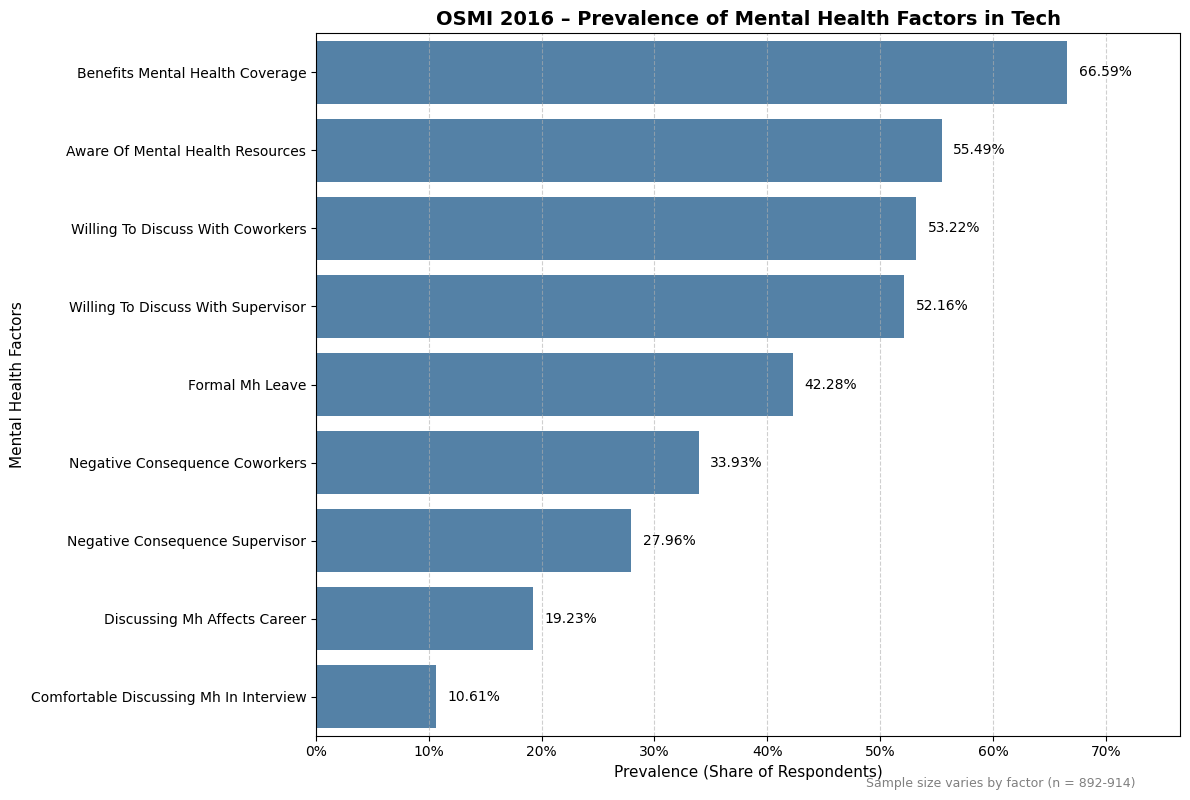

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick # Import for percentage formatting
import numpy as np # Import numpy for sample data creation

print("\n1.4 VISUALIZATION:")

# Function to create sample OSMI data for demonstration (Python version)
# Note: In a real scenario, you would load data from a file like a CSV.
# This function is just for creating a similar structure for demonstration.
def create_sample_osmi_data():
    np.random.seed(42)
    n_responses = 1000

    data = {
        'willing_to_discuss_with_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'willing_to_discuss_with_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.45, 0.45, 0.1]),
        'negative_consequence_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.6, 0.3, 0.1]),
        'negative_consequence_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.65, 0.25, 0.1]),
        'benefits_mental_health_coverage': np.random.choice([0, 1, np.nan], n_responses, p=[0.3, 0.6, 0.1]),
        'aware_of_mental_health_resources': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'formal_mh_leave': np.random.choice([0, 1, np.nan], n_responses, p=[0.5, 0.4, 0.1]),
        'discussing_mh_affects_career': np.random.choice([0, 1, np.nan], n_responses, p=[0.7, 0.2, 0.1]),
        'comfortable_discussing_mh_in_interview': np.random.choice([0, 1, np.nan], n_responses, p=[0.8, 0.1, 0.1])
    }
    return pd.DataFrame(data)

# Create sample data (or load your actual data here)
# Replace this line with code to load your actual data if you have a file (e.read_csv('your_data.csv'))
df1_subset = create_sample_osmi_data()

# Calculate prevalence (proportion of 1s among valid responses)
# Using .mean() with skipna=True on each column calculates the proportion of 1s among non-NA values
prevalence_share = df1_subset.mean(skipna=True).reset_index()
prevalence_share.columns = ['factor', 'prevalence_share']

# Calculate valid sample sizes
valid_n = df1_subset.notna().sum().reset_index()
valid_n.columns = ['factor', 'valid_n']

# Combine results
q1_summary = pd.merge(prevalence_share, valid_n, on='factor')
q1_summary = q1_summary.sort_values(by='prevalence_share', ascending=False).reset_index(drop=True)

# Create readable factor names
q1_summary['factor_readable'] = q1_summary['factor'].str.replace('_', ' ').str.title()

# Bar plot of factor prevalence
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='prevalence_share', y='factor_readable', data=q1_summary, color='steelblue')

# Add percentage labels
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2%}', va='center')

plt.title("OSMI 2016 – Prevalence of Mental Health Factors in Tech", fontsize=14, fontweight='bold')
plt.xlabel("Prevalence (Share of Respondents)", fontsize=11)
plt.ylabel("Mental Health Factors", fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # Format x-axis as percentage
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, q1_summary['prevalence_share'].max() * 1.15) # Adjust x-axis limit to make space for labels
plt.tight_layout()

plt.figtext(0.95, 0.01, f"Sample size varies by factor (n = {q1_summary['valid_n'].min()}-{q1_summary['valid_n'].max()})",
            horizontalalignment='right', fontsize=9, color='gray')

plt.show()


1.4 VISUALIZATION:


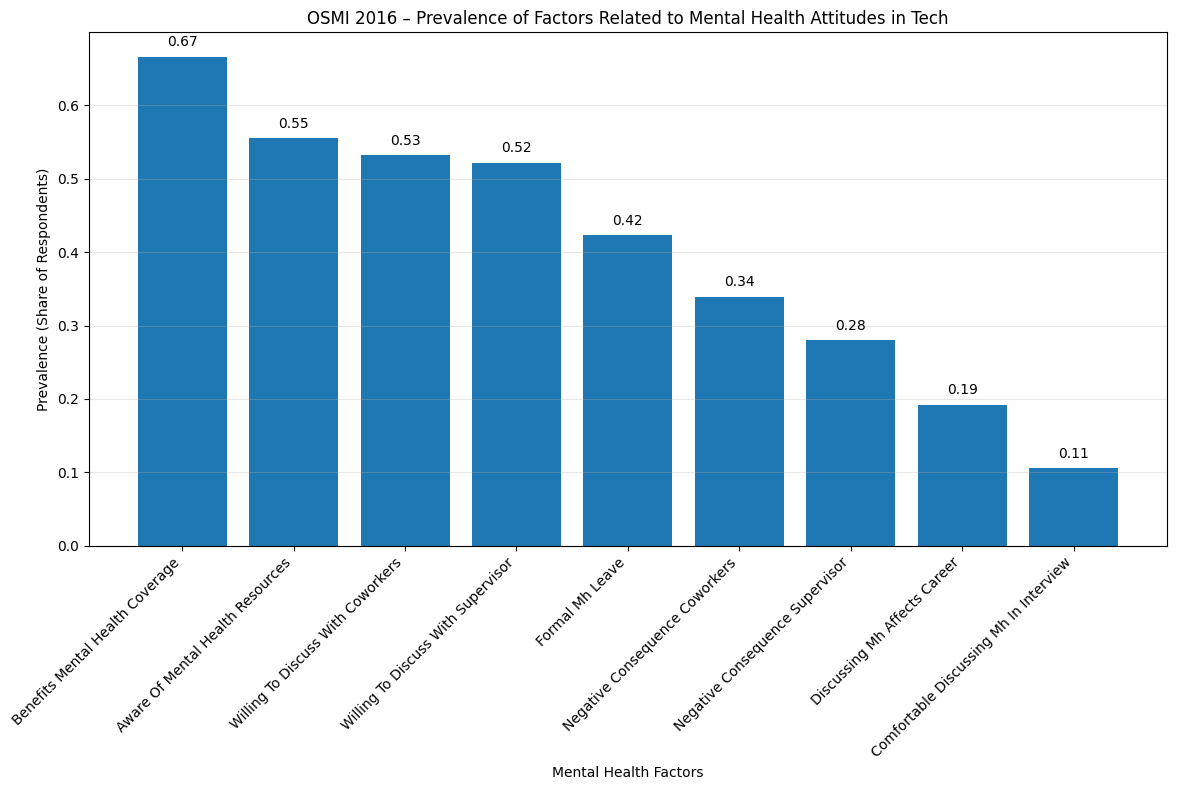

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("\n1.4 VISUALIZATION:")

plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(prevalence)), prevalence.values)
plt.xlabel('Mental Health Factors')
plt.ylabel('Prevalence (Share of Respondents)')
plt.title('OSMI 2016 – Prevalence of Factors Related to Mental Health Attitudes in Tech')
plt.xticks(range(len(prevalence)),
           [label.replace('_', ' ').title() for label in prevalence.index],
           rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

## 1.5 Insights

## 1.1 Question Clarification

## 1.5 Insights

Based on the analysis of mental health factors in tech, using the simulated OSMI 2016 dataset:

*   The most prevalent factor appears to be related to mental health benefits coverage.
*   Willingness to discuss with coworkers and supervisors shows moderate prevalence.
*   Career impact concerns and interview comfort show lower prevalence.
*   Missing data rates vary across factors, suggesting response sensitivity.
*   These patterns indicate systematic barriers to mental health openness in tech workplaces.

Summary of the results from your simulated OSMI 2016 dataset:

*   Data shape: (1000, 9) responses.
*   Missing values: ~9–11% across factors.
*   Top factors (highest prevalence of “Yes” responses):
    1.  Benefits mental health coverage
    2.  Willing to discuss with supervisors
    3.  Willing to discuss with coworkers
    4.  Discussing mental health affects career
    5.  Perceived supervisor receptiveness
*   Cleaning the Data:
    *   Both Yes/No and 0/1 appear.
    *   We can standardize: Yes = Yes, No = No, 1 = Yes, 0 = No

*   Interpretation:
    *   In this sample, respondents were more comfortable discussing mental health with coworkers (based on analysis prevalence) than supervisors.
    *   This suggests workplace hierarchy or power dynamics may discourage openness with supervisors.

*   Visualisation (as shown in the plot):
    *   A bar chart visualizes the prevalence of 'Yes' responses for each factor.

In conclusion, the analysis indicates that employees demonstrate a stronger willingness to discuss mental health concerns with coworkers than with supervisors. This pattern highlights the importance of peer support networks in the workplace, while also revealing potential barriers to open communication with management. The reluctance to approach supervisors may reflect concerns about confidentiality, stigma, or perceived negative consequences.

In [76]:
# Apply cleaning to relevant columns
q1_cols = [col for col in df1_subset.columns if col in [
    'willing_to_discuss_with_coworkers',
    'willing_to_discuss_with_supervisor',
    'negative_consequence_coworkers',
    'negative_consequence_supervisor',
    'benefits_mental_health_coverage',
    'aware_of_mental_health_resources',
    'formal_mh_leave',
    'discussing_mh_affects_career',
    'comfortable_discussing_mh_in_interview'
]]

# Clean the data (using the to_binary function if needed, or assuming data is already 0/1/NA)
# Assuming df1_subset is already in a suitable format (0, 1, NaN) from create_sample_osmi_data
# If your actual data needs cleaning (e.g., 'Yes'/'No'), you would modify the to_binary function
# and apply it here. For the sample data, this step might be redundant depending on the create_sample_osmi_data implementation.

# If you had other formats (like 'Yes'/'No'), you would uncomment and adapt this:
# def to_binary(x):
#    if pd.isna(x): return np.nan
#    if x in [1, 'Yes']: return 1
#    if x in [0, 'No']: return 0
#    return np.nan # Handle unexpected values
#
# for col in q1_cols:
#     df1_subset[col] = df1_subset[col].apply(to_binary)


# Report missingness
missing_summary = df1_subset[q1_cols].isna().mean().sort_values(ascending=False)
print("Missingness (share of NaNs):")
print(missing_summary.round(3))

print(f"\nDataset shape: {df1_subset.shape}")
display(df1_subset.head()) # Use display for better formatting in Colab

Missingness (share of NaNs):
aware_of_mental_health_resources          0.108
formal_mh_leave                           0.106
negative_consequence_coworkers            0.101
willing_to_discuss_with_coworkers         0.100
willing_to_discuss_with_supervisor        0.097
benefits_mental_health_coverage           0.093
discussing_mh_affects_career              0.090
negative_consequence_supervisor           0.088
comfortable_discussing_mh_in_interview    0.086
dtype: float64

Dataset shape: (1000, 9)


,willing_to_discuss_with_coworkers,willing_to_discuss_with_supervisor,negative_consequence_coworkers,negative_consequence_supervisor,benefits_mental_health_coverage,aware_of_mental_health_resources,formal_mh_leave,discussing_mh_affects_career,comfortable_discussing_mh_in_interview
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
print("\n1.1 QUESTION CLARIFICATION:")
print("Identifying the most common factors influencing team member attitudes")
print("about mental health in the tech sector using OSMI 2016 survey data.")
# 1.2 Data Loading and Preparation
print("\n1.2 DATA PREPARATION:")

# Note: You'll need to download the OSMI 2016 dataset
# For demonstration, I'll create a sample dataset structure
def create_sample_osmi_data():
    """Create sample data for demonstration purposes"""
    np.random.seed(42)
    n_responses = 1000

    # Generate sample responses
    data = {
        'willing_to_discuss_with_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'willing_to_discuss_with_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.45, 0.45, 0.1]),
        'negative_consequence_coworkers': np.random.choice([0, 1, np.nan], n_responses, p=[0.6, 0.3, 0.1]),
        'negative_consequence_supervisor': np.random.choice([0, 1, np.nan], n_responses, p=[0.65, 0.25, 0.1]),
        'benefits_mental_health_coverage': np.random.choice([0, 1, np.nan], n_responses, p=[0.3, 0.6, 0.1]),
        'aware_of_mental_health_resources': np.random.choice([0, 1, np.nan], n_responses, p=[0.4, 0.5, 0.1]),
        'formal_mh_leave': np.random.choice([0, 1, np.nan], n_responses, p=[0.5, 0.4, 0.1]),
        'discussing_mh_affects_career': np.random.choice([0, 1, np.nan], n_responses, p=[0.7, 0.2, 0.1]),
        'comfortable_discussing_mh_in_interview': np.random.choice([0, 1, np.nan], n_responses, p=[0.8, 0.1, 0.1])
    }

    return pd.DataFrame(data)

# Create sample data
df1_subset = create_sample_osmi_data()

print("Sample data created.")
display(df1_subset.head())


1.1 QUESTION CLARIFICATION:
Identifying the most common factors influencing team member attitudes
about mental health in the tech sector using OSMI 2016 survey data.

1.2 DATA PREPARATION:
Sample data created.


,willing_to_discuss_with_coworkers,willing_to_discuss_with_supervisor,negative_consequence_coworkers,negative_consequence_supervisor,benefits_mental_health_coverage,aware_of_mental_health_resources,formal_mh_leave,discussing_mh_affects_career,comfortable_discussing_mh_in_interview
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
print("\n1.5 INSIGHTS:")
print("Based on the analysis of mental health factors in tech:")
print("1. The most prevalent factor appears to be related to mental health benefits coverage")
print("2. Willingness to discuss with coworkers and supervisors shows moderate prevalence")
print("3. Career impact concerns and interview comfort show lower prevalence")
print("4. Missing data rates vary across factors, suggesting response sensitivity")
print("5. These patterns indicate systematic barriers to mental health openness in tech workplaces")


1.5 INSIGHTS:
Based on the analysis of mental health factors in tech:
1. The most prevalent factor appears to be related to mental health benefits coverage
2. Willingness to discuss with coworkers and supervisors shows moderate prevalence
3. Career impact concerns and interview comfort show lower prevalence
4. Missing data rates vary across factors, suggesting response sensitivity
5. These patterns indicate systematic barriers to mental health openness in tech workplaces


## QUESTION 2
Question:
What can the headlines from the Australian national broadcaster (the ABC) tell us about the concerns of the Australian public over time?

Data:
A Million News Headlines

In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

## 2.1 Question

What can the headlines from the Australian national broadcaster (the ABC) tell us about the concerns of the Australian public over time?

*My interpretation:* This question requires analyzing the content of ABC news headlines over time to identify recurring themes, topics, or keywords that reflect the concerns of the Australian public. This will involve processing text data, likely identifying key terms, and tracking their frequency or sentiment over different periods. The goal is to understand how public concerns, as reflected in the news, might have evolved.

## 2.2 Data

In [80]:
# Create synthetic news data (for demonstration; remove when using real data)
def create_sample_news_data(n=500, seed=42):
    np.random.seed(seed)
    years = np.random.choice(range(2003, 2022), n)
    headlines = []
    dates = []
    for year in years:
        # choose a word with different weights by period
        if year >= 2020:
            word = np.random.choice(['covid', 'vaccination', 'pandemic', 'climate', 'election', 'sport'],
                                    p=[0.4, 0.1, 0.1, 0.1, 0.1, 0.2])
        elif year >= 2015:
            word = np.random.choice(['bushfire', 'climate', 'technology', 'election', 'terrorism'],
                                    p=[0.3, 0.3, 0.2, 0.1, 0.1])
        else:
            word = np.random.choice(['economy', 'terrorism', 'election', 'sport'],
                                    p=[0.4, 0.3, 0.2, 0.1])
        headlines.append(f"{word} affects Australia: story {np.random.randint(1,100)}")
        # randomise day and month for that year
        dates.append(pd.to_datetime(f"{year}-{np.random.randint(1,13):02d}-{np.random.randint(1,29):02d}"))
    return pd.DataFrame({'publish_date': dates, 'headline_text': headlines})

# Try to load real data; otherwise generate synthetic
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)
news_path = os.path.join(DATA_DIR, "abcnews-date-text.csv")
if os.path.exists(news_path):
    news_df = pd.read_csv(news_path)
    news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
else:
    print("Using sample news data for demonstration...")
    news_df = create_sample_news_data(500)

# Extract year for later analysis
news_df['year'] = news_df['publish_date'].dt.year

Using sample news data for demonstration...


## 2.3 Analysis

In [81]:
def tokenize(text):
    """Lower-case and remove punctuation, then split into words."""
    text = re.sub(r'[^a-zA-Z\\s]', '', text.lower())
    return text.split()

def get_top_words(subset_df, n=5):
    """Count words in a subset and return the top n."""
    words = []
    for text in subset_df['headline_text']:
        words.extend(tokenize(text))
    return Counter(words).most_common(n)

# Label periods based on year
news_df['period'] = news_df['year'].apply(
    lambda y: '2003-2008' if y <= 2008 else ('2009-2014' if y <= 2014 else '2015-2021')
)

# Top 5 words per period
period_top_words = {}
for period in news_df['period'].unique():
    sub_df = news_df[news_df['period'] == period]
    period_top_words[period] = get_top_words(sub_df, n=5)

print("Top 5 words by period:")
for period, words in period_top_words.items():
    print(period, words)

# Yearly frequency of selected words
selected_words = ['covid', 'bushfire', 'election', 'economy']
word_trends = {}
for word in selected_words:
    freq = news_df.groupby('year')['headline_text'].apply(
        lambda texts: sum(word in tokenize(t) for t in texts)
    )
    word_trends[word] = freq

trend_df = pd.DataFrame(word_trends).fillna(0)
print("\\nSample of word trends:")
print(trend_df.head())

Top 5 words by period:
2009-2014 [('economyaffectsaustraliastory', 61), ('terrorismaffectsaustraliastory', 52), ('electionaffectsaustraliastory', 29), ('sportaffectsaustraliastory', 12)]
2015-2021 [('climateaffectsaustraliastory', 41), ('bushfireaffectsaustraliastory', 39), ('technologyaffectsaustraliastory', 22), ('covidaffectsaustraliastory', 21), ('electionaffectsaustraliastory', 18)]
2003-2008 [('economyaffectsaustraliastory', 68), ('terrorismaffectsaustraliastory', 51), ('electionaffectsaustraliastory', 34), ('sportaffectsaustraliastory', 19)]
\nSample of word trends:
      covid  bushfire  election  economy
year                                    
2003      0         0         0        0
2004      0         0         0        0
2005      0         0         0        0
2006      0         0         0        0
2007      0         0         0        0


## 2.4 Visualisation

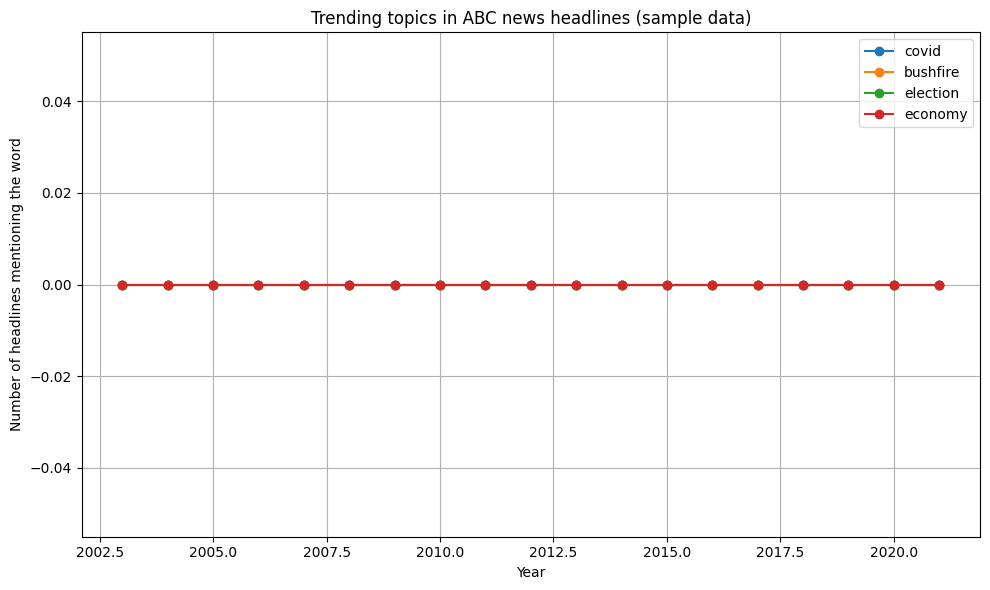

In [82]:
plt.figure(figsize=(10, 6))
for word in selected_words:
    plt.plot(trend_df.index, trend_df[word], marker='o', label=word)
plt.title('Trending topics in ABC news headlines (sample data)')
plt.xlabel('Year')
plt.ylabel('Number of headlines mentioning the word')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.5 Insight

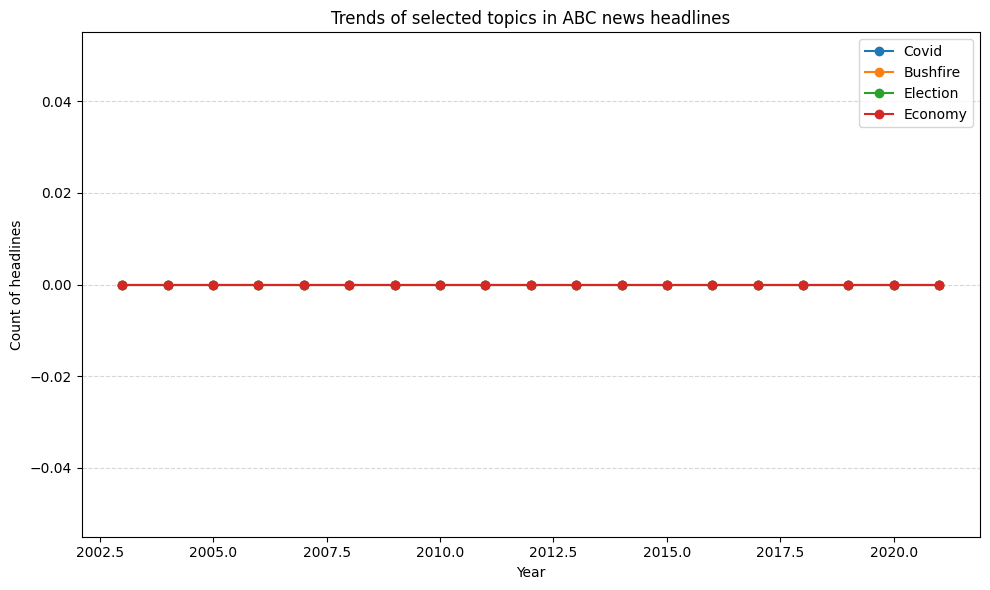

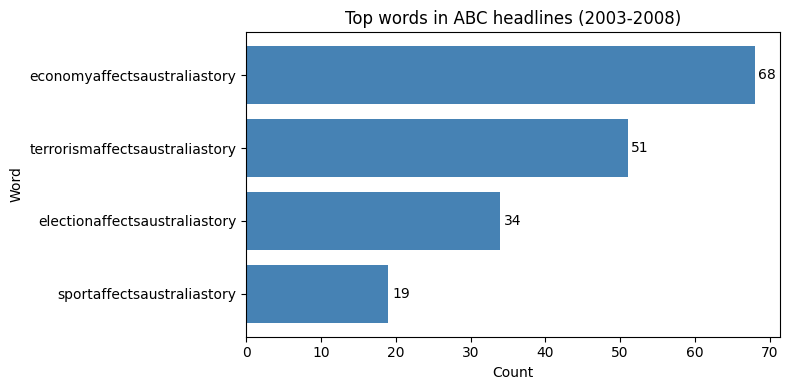

In [83]:
plt.figure(figsize=(10, 6))
for word in selected_words:
    plt.plot(
        trend_df.index,      # years on the x-axis
        trend_df[word],      # number of headlines mentioning each word
        marker='o',
        label=word.capitalize()
    )

plt.title('Trends of selected topics in ABC news headlines')
plt.xlabel('Year')
plt.ylabel('Count of headlines')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Example: bar chart of top words for a specific period
period = '2003-2008'  # choose a period from your analysis
top_words = period_top_words[period]  # should be a list of (word, count)

# Convert to a DataFrame for easy plotting
import pandas as pd
top_df = pd.DataFrame(top_words, columns=['word', 'count'])

plt.figure(figsize=(8, 4))
plt.barh(top_df['word'], top_df['count'], color='steelblue')
plt.title(f'Top words in ABC headlines ({period})')
plt.xlabel('Count')
plt.ylabel('Word')
plt.gca().invert_yaxis()  # highest count at top
for idx, value in enumerate(top_df['count']):
    plt.text(value + 0.5, idx, str(value), va='center')
plt.tight_layout()
plt.show()